In [116]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras import backend as K

from matplotlib import pyplot as plt
import numpy as np

In [103]:
batch_size = 1024
num_classes = 2
epochs = 20

In [192]:
x, y = make_moons(n_samples=1000, noise=0.06)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [193]:
y[:5]

array([1, 0, 1, 1, 1])

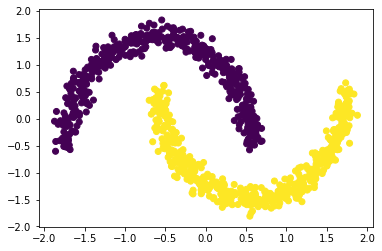

In [194]:
plt.scatter(x.T[0], x.T[1], c=y);

$$
\begin{align}
n_0 &= 2 \\
N &= 3
\end{align}
$$

For 1 hidden layer with 2 neurons,

$$
\begin{align}
n_1 &= 2 \\
n_L &= 2 \\
L &= 1
\end{align}
$$

And therefore $\prod\limits_{i=1}^{L-1} \lfloor \frac{n_i}{n_0} \rfloor^{n_0} = 1$, $\sum\limits_{j=0}^{n_0} {n_L \choose j} = 4$

In [195]:
model = Sequential([
    Dense(2, activation='relu', input_shape=(2,)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [196]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [197]:
model.fit(x, y, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5554 - acc: 0.7290
Epoch 2/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.5371 - acc: 0.8550
Epoch 3/100
1000/1000 [==============================] - 0s 218us/step - loss: 0.5220 - acc: 0.8510
Epoch 4/100
1000/1000 [==============================] - 0s 210us/step - loss: 0.5093 - acc: 0.8500
Epoch 5/100
1000/1000 [==============================] - 0s 221us/step - loss: 0.4982 - acc: 0.8530
Epoch 6/100
1000/1000 [==============================] - 0s 223us/step - loss: 0.4883 - acc: 0.8550
Epoch 7/100
1000/1000 [==============================] - 0s 324us/step - loss: 0.4792 - acc: 0.8500
Epoch 8/100
1000/1000 [==============================] - 0s 247us/step - loss: 0.4705 - acc: 0.8540
Epoch 9/100
1000/1000 [==============================] - 0s 213us/step - loss: 0.4624 - acc: 0.8540
Epoch 10/100
1000/1000 [==============================] - 0s 220us/step - loss: 0.4545 - acc: 0.8590
E

In [48]:
# from https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efb476e2d10>)

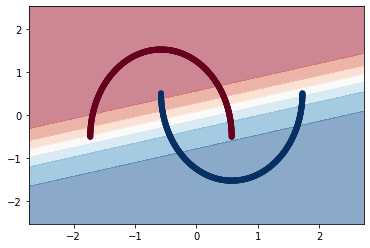

In [168]:
plot_decision_boundary(x, y, model, cmap='RdBu')

In [198]:
cluster = DBSCAN(eps=0.07, min_samples=4)

In [199]:
cluster.fit(x)

DBSCAN(algorithm='auto', eps=0.07, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

116


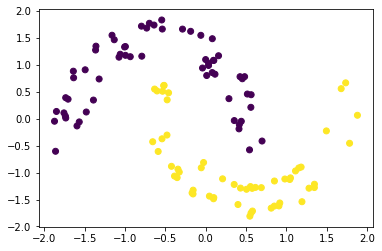

In [200]:
xb = x[np.where(cluster.labels_ == -1)[0]]
yb = y[np.where(cluster.labels_ == -1)[0]]
print(len(xb))
plt.scatter(xb.T[0], xb.T[1], c=yb)

In [201]:
model2 = Sequential([
    Dense(2, activation='relu', input_shape=(2,)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(xb, yb, epochs=100)

Epoch 1/100
116/116 [==============================] - 4s 35ms/step - loss: 0.6874 - acc: 0.7500
Epoch 2/100
116/116 [==============================] - 0s 256us/step - loss: 0.6859 - acc: 0.7500
Epoch 3/100
116/116 [==============================] - 0s 386us/step - loss: 0.6843 - acc: 0.7500
Epoch 4/100
116/116 [==============================] - 0s 449us/step - loss: 0.6828 - acc: 0.7500
Epoch 5/100
116/116 [==============================] - 0s 352us/step - loss: 0.6813 - acc: 0.7500
Epoch 6/100
116/116 [==============================] - 0s 287us/step - loss: 0.6796 - acc: 0.7500
Epoch 7/100
116/116 [==============================] - 0s 274us/step - loss: 0.6783 - acc: 0.7500
Epoch 8/100
116/116 [==============================] - 0s 334us/step - loss: 0.6767 - acc: 0.7500
Epoch 9/100
116/116 [==============================] - 0s 332us/step - loss: 0.6751 - acc: 0.7500
Epoch 10/100
116/116 [==============================] - 0s 391us/step - loss: 0.6737 - acc: 0.7500
Epoch 11/100
116/116

In [208]:
len(np.concatenate([xb, xb], axis=0))
np.concatenate([xb, xb], axis=0).shape

(232, 2)

In [209]:
xb3 = np.concatenate([xb, xb, xb], axis=0)
yb3 = np.concatenate([yb, yb, yb], axis=0)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(xb3, yb3, epochs=100)

Epoch 1/100
348/348 [==============================] - 4s 12ms/step - loss: 0.5151 - acc: 0.7845
Epoch 2/100
348/348 [==============================] - 0s 265us/step - loss: 0.5116 - acc: 0.7902
Epoch 3/100
348/348 [==============================] - 0s 258us/step - loss: 0.5081 - acc: 0.7931
Epoch 4/100
348/348 [==============================] - 0s 223us/step - loss: 0.5048 - acc: 0.7931
Epoch 5/100
348/348 [==============================] - 0s 259us/step - loss: 0.5018 - acc: 0.7931
Epoch 6/100
348/348 [==============================] - 0s 270us/step - loss: 0.4985 - acc: 0.7931
Epoch 7/100
348/348 [==============================] - 0s 269us/step - loss: 0.4956 - acc: 0.7960
Epoch 8/100
348/348 [==============================] - 0s 302us/step - loss: 0.4926 - acc: 0.8017
Epoch 9/100
348/348 [==============================] - 0s 325us/step - loss: 0.4896 - acc: 0.8017
Epoch 10/100
348/348 [==============================] - 0s 286us/step - loss: 0.4868 - acc: 0.8017
Epoch 11/100
348/348